In [1]:
# Assurez-vous que les bibliothèques nécessaires sont installées
#!pip install pandas numpy matplotlib


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings(action="ignore")
import seaborn as sns

<div style="background-color: #3498db; border-radius: 10px; text-align: center; padding: 10px;">
    <h1>Data Loading</h1>
</div>


In [3]:
# Importation des bibliothèques nécessaires
import pandas as pd

# Téléchargement des fichiers (les chemins doivent être adaptés si les fichiers sont en ligne)
# Pour l'exemple, nous utilisons des chemins locaux

# Transaction Records
transaction_records = pd.read_csv('Folder1/transaction_records.csv')

# Transaction Metadata
transaction_metadata = pd.read_csv('Folder1/transaction_metadata.csv')

# Customer Data
customer_data = pd.read_csv('Folder2/customer_data.csv')

# Account Activity
account_activity = pd.read_csv('Folder2/account_activity.csv')

# Fraud Indicators
fraud_indicators = pd.read_csv('Folder3/fraud_indicators.csv')

# Suspicious Activity
suspicious_activity = pd.read_csv('Folder3/suspicious_activity.csv')

# Amount Data
amount_data = pd.read_csv('Folder4/amount_data.csv')

# Anomaly Scores
anomaly_scores = pd.read_csv('Folder4/anomaly_scores.csv')

# Merchant Data
merchant_data = pd.read_csv('Folder5/merchant_data.csv')

# Transaction Category Labels
transaction_category_labels = pd.read_csv('Folder5/transaction_category_labels.csv')


let print the hed of the datasets:

In [4]:
# Afficher les premières lignes de chaque dataset pour examen
print("Transaction Records:")
print(transaction_records.head())

print("\nTransaction Metadata:")
print(transaction_metadata.head())

print("\nCustomer Data:")
print(customer_data.head())

print("\nAccount Activity:")
print(account_activity.head())

print("\nFraud Indicators:")
print(fraud_indicators.head())

print("\nSuspicious Activity:")
print(suspicious_activity.head())

print("\nAmount Data:")
print(amount_data.head())

print("\nAnomaly Scores:")
print(anomaly_scores.head())

print("\nMerchant Data:")
print(merchant_data.head())

print("\nTransaction Category Labels:")
print(transaction_category_labels.head())


Transaction Records:
   TransactionID     Amount  CustomerID
0            1.0  12.450998      1454.0
1            2.0  59.128027      1178.0
2            3.0  10.443978      1484.0
3            4.0  39.421277      1380.0
4            5.0  72.452216      1204.0

Transaction Metadata:
   TransactionID            Timestamp  MerchantID
0            1.0                  NaN      2254.0
1            2.0  2022-01-01 01:00:00      2295.0
2            3.0                  NaN      2239.0
3            4.0  2022-01-01 03:00:00      2261.0
4            5.0  2022-01-01 04:00:00         NaN

Customer Data:
   CustomerID           Name   Age       Address
0      1001.0  Customer 1001  20.0           NaN
1      1002.0  Customer 1002  58.0  Address 1002
2      1003.0  Customer 1003  26.0  Address 1003
3         NaN  Customer 1004  26.0           NaN
4         NaN  Customer 1005  53.0  Address 1005

Account Activity:
   CustomerID  AccountBalance   LastLogin
0        1001     9688.058811  2022-01-01
1  

An Anomaly Score quantitatively measures how unusual a particular observation is compared to the overall data, using a scale that typically ranges from normal to highly unusual. This helps in assessing the risk of an observation being problematic. On the other hand, a Fraud Indicator Flag is a binary label, either 0 or 1, directly classifying each observation as normal or fraudulent based on predefined criteria, such as manual review or thresholds set on the anomaly score. While the anomaly score provides a continuous measure of risk, the fraud indicator flag gives a clear, binary decision, making it easier to take action on potential fraud cases.

In [5]:
import pandas as pd

# Fusion des données relatives aux transactions
transaction_data = pd.merge(transaction_records,amount_data, on="TransactionID")
transaction_data = pd.merge(transaction_data, fraud_indicators, on="TransactionID")
transaction_data = pd.merge(transaction_data, transaction_metadata, on="TransactionID")
transaction_data = pd.merge(transaction_data, anomaly_scores, on="TransactionID")
transaction_data = pd.merge(transaction_data, transaction_category_labels, on="TransactionID")

# Fusion des données relatives aux clients
customer_data = pd.merge(customer_data, account_activity, on="CustomerID")
customer_data = pd.merge(customer_data, suspicious_activity, on="CustomerID")

# Fusion finale des données des transactions avec les données des clients
data = pd.merge(transaction_data, customer_data, on="CustomerID")

# Affichage des dataframes résultants
print("Combined Data:")
print(data.head())
print("\nTransaction Data:")
print(transaction_data.head())
print("\nCustomer Data:")
print(customer_data.head())


Combined Data:
   TransactionID     Amount  CustomerID  TransactionAmount  FraudIndicator   
0            1.0  12.450998      1454.0          31.071876               0  \
1          328.0  16.794415      1454.0        1499.608697               0   
2          406.0        NaN      1454.0          32.138117               0   
3            2.0  59.128027      1178.0          75.426673               0   
4            3.0  10.443978      1484.0          26.432150               0   

             Timestamp  MerchantID  AnomalyScore Category           Name   
0                  NaN      2254.0      0.556580    Other  Customer 1454  \
1  2022-01-14 15:00:00      2413.0      0.622154    Other  Customer 1454   
2  2022-01-17 21:00:00      2292.0      0.417533     Food  Customer 1454   
3  2022-01-01 01:00:00      2295.0      0.327841   Online  Customer 1178   
4                  NaN      2239.0      0.773555   Travel  Customer 1484   

    Age       Address  AccountBalance   LastLogin  Suspicio

In [6]:
import pandas as pd
import numpy as np

# Assuming 'data' is already defined from your previous merges
# Remove the existing FraudIndicator if exists
if 'FraudIndicator' in data.columns:
    data.drop(columns=['FraudIndicator'], inplace=True)

# Create a new FraudIndicator with broader criteria
def determine_fraud_extended(row, customer_transactions):
    # Get the count of high-value transactions for the current customer
    customer_high_value_count = customer_transactions.get(row['CustomerID'], 0)
    
    # Conditions for labeling as fraud
    if row['TransactionAmount'] > 150 and row['AnomalyScore'] > 0.5:
        return 1
    if row['Age'] < 40 and row['TransactionAmount'] > 150:
        return 1
    if customer_high_value_count > 3 and row['TransactionAmount'] > 150:
        return 1
    return 0

# Count high-value transactions for each customer
high_value_transactions = data[data['TransactionAmount'] > 150]['CustomerID'].value_counts()

# Apply the function to create a new 'FraudIndicator'
data['FraudIndicator'] = data.apply(determine_fraud_extended, axis=1, 
                                    customer_transactions=high_value_transactions)

# Randomly add some transactions as fraudulent for realism
random_fraud_indices = data.sample(frac=0.05).index  # 5% random fraud
data.loc[random_fraud_indices, 'FraudIndicator'] = 1

# Adjust 'AnomalyScore' and 'SuspiciousFlag' to be more correlated with the new FraudIndicator
# Increase the 'AnomalyScore' for new fraudulent transactions
data.loc[data['FraudIndicator'] == 1, 'AnomalyScore'] = np.clip(data['AnomalyScore'] + 0.4, 0, 1)

# Set 'SuspiciousFlag' to 1 for most of the fraudulent transactions
data['SuspiciousFlag'] = np.where((data['FraudIndicator'] == 1) & (np.random.rand(len(data)) > 0.3), 1, data['SuspiciousFlag'])



In [7]:
data.head()

,TransactionID,Amount,CustomerID,TransactionAmount,Timestamp,MerchantID,AnomalyScore,Category,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag,FraudIndicator
0,1.0,12.450998,1454.0,31.071876,NaN,2254.0,0.556580,Other,Customer 1454,53.0,Address 1454,8995.239040,2023-03-30,0,0
1,328.0,16.794415,1454.0,1499.608697,2022-01-14 15:00:00,2413.0,1.000000,Other,Customer 1454,53.0,Address 1454,8995.239040,2023-03-30,0,1
2,406.0,NaN,1454.0,32.138117,2022-01-17 21:00:00,2292.0,0.417533,Food,Customer 1454,53.0,Address 1454,8995.239040,2023-03-30,0,0
3,2.0,59.128027,1178.0,75.426673,2022-01-01 01:00:00,2295.0,0.327841,Online,Customer 1178,52.0,NaN,4015.301037,2022-06-27,0,0
4,3.0,10.443978,1484.0,26.432150,NaN,2239.0,0.773555,Travel,Customer 1484,53.0,Address 1484,7867.847795,2023-04-29,0,0


<div style="background-color: #bde0fe; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">Data Exploration</h1>
</div>


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      1115 non-null   float64
 1   Amount             1067 non-null   float64
 2   CustomerID         1115 non-null   float64
 3   TransactionAmount  1051 non-null   float64
 4   Timestamp          1065 non-null   object 
 5   MerchantID         1054 non-null   float64
 6   AnomalyScore       1115 non-null   float64
 7   Category           1115 non-null   object 
 8   Name               993 non-null    object 
 9   Age                1007 non-null   float64
 10  Address            1020 non-null   object 
 11  AccountBalance     1115 non-null   float64
 12  LastLogin          1115 non-null   object 
 13  SuspiciousFlag     1115 non-null   int64  
 14  FraudIndicator     1115 non-null   int64  
dtypes: float64(8), int64(2), object(5)
memory usage: 130.8+ KB


In [9]:
data.shape

(1115, 15)

In [10]:
data.describe()

,TransactionID,Amount,CustomerID,TransactionAmount,MerchantID,AnomalyScore,Age,AccountBalance,SuspiciousFlag,FraudIndicator
count,1115.000000,1067.000000,1115.000000,1051.000000,1054.000000,1115.000000,1007.000000,1115.000000,1115.000000,1115.000000
mean,753.165022,70.851415,1507.824215,69.886240,2501.946869,0.510822,41.378352,6124.158582,0.053812,0.058296
std,430.217351,179.874208,286.220106,155.759654,288.381749,0.286537,13.844308,6047.816398,0.225747,0.234407
min,1.000000,10.000204,1006.000000,10.021227,2002.000000,0.000349,18.000000,1024.857875,0.000000,0.000000
25%,385.500000,31.270140,1259.500000,32.720039,2254.000000,0.266344,29.000000,3108.415423,0.000000,0.000000
50%,764.000000,53.952194,1496.000000,52.739081,2509.000000,0.523267,42.000000,5690.216072,0.000000,0.000000
75%,1119.500000,78.721559,1758.000000,75.379228,2757.750000,0.755384,54.000000,7817.100542,0.000000,0.000000
max,1499.000000,1999.168277,2000.000000,1499.608697,3000.000000,1.000000,64.000000,49980.308936,1.000000,1.000000


In [11]:

data.columns

Index(['TransactionID', 'Amount', 'CustomerID', 'TransactionAmount',
       'Timestamp', 'MerchantID', 'AnomalyScore', 'Category', 'Name', 'Age',
       'Address', 'AccountBalance', 'LastLogin', 'SuspiciousFlag',
       'FraudIndicator'],
      dtype='object')

In [12]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(numerical_features)
print(categorical_features)

['TransactionID', 'Amount', 'CustomerID', 'TransactionAmount', 'MerchantID', 'AnomalyScore', 'Age', 'AccountBalance', 'SuspiciousFlag', 'FraudIndicator']
['Timestamp', 'Category', 'Name', 'Address', 'LastLogin']


<div style="background-color: #cdb4db; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">Data Visualization</h1>
</div>


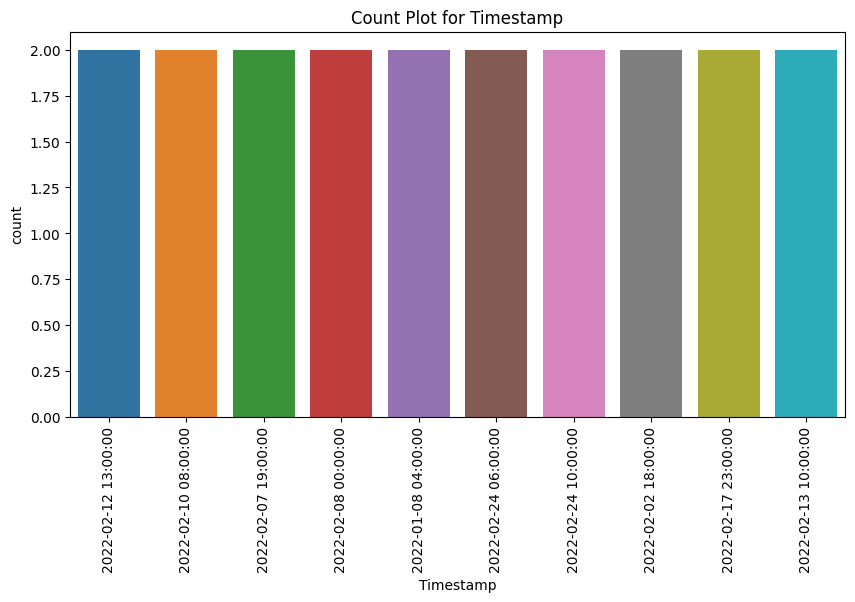

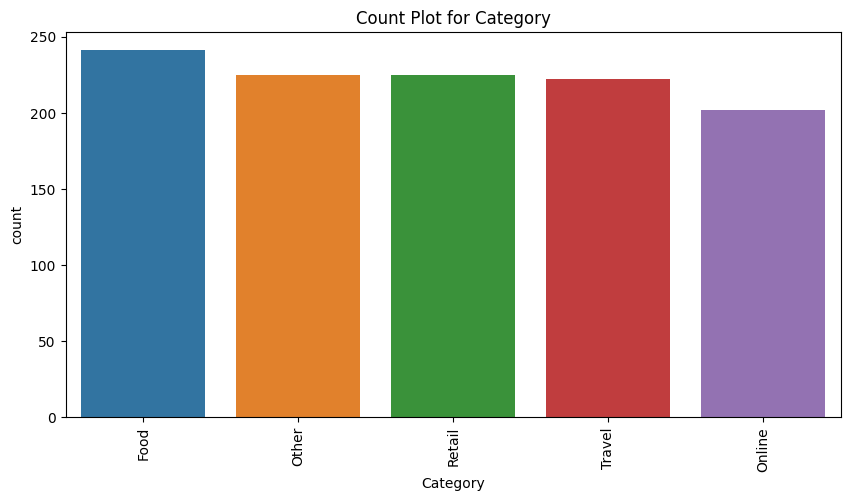

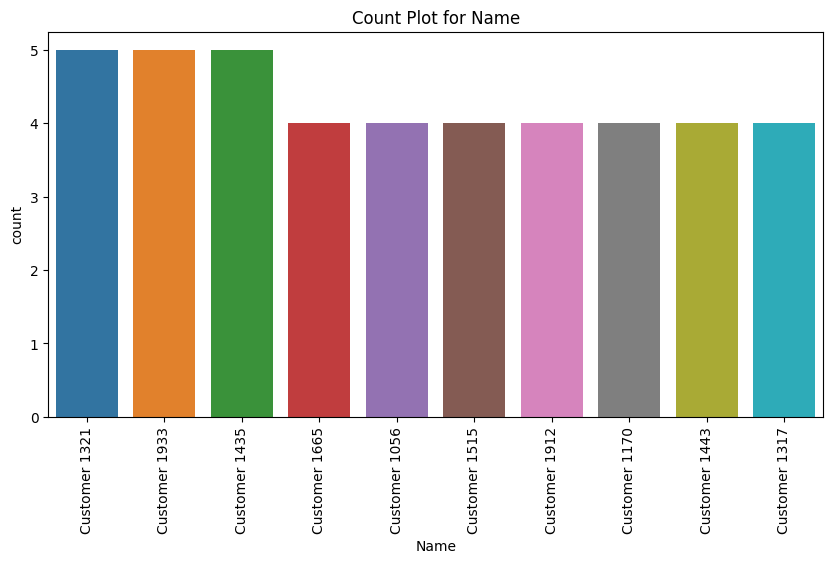

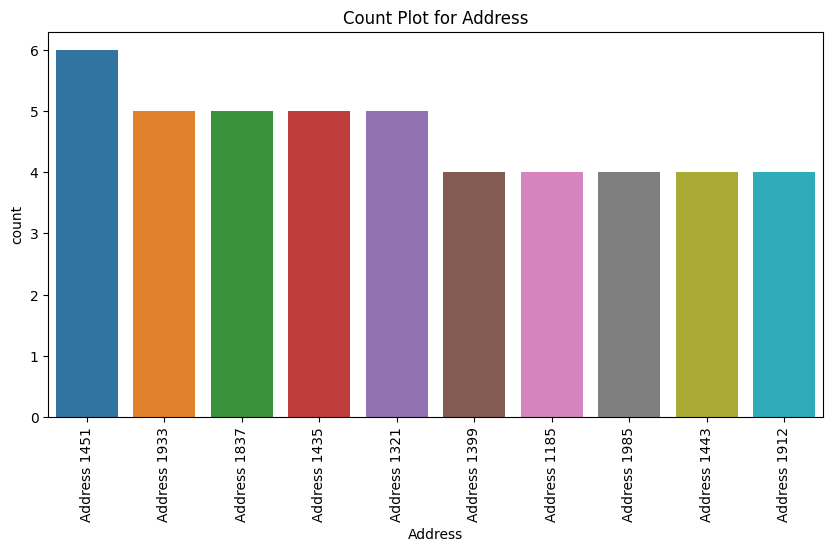

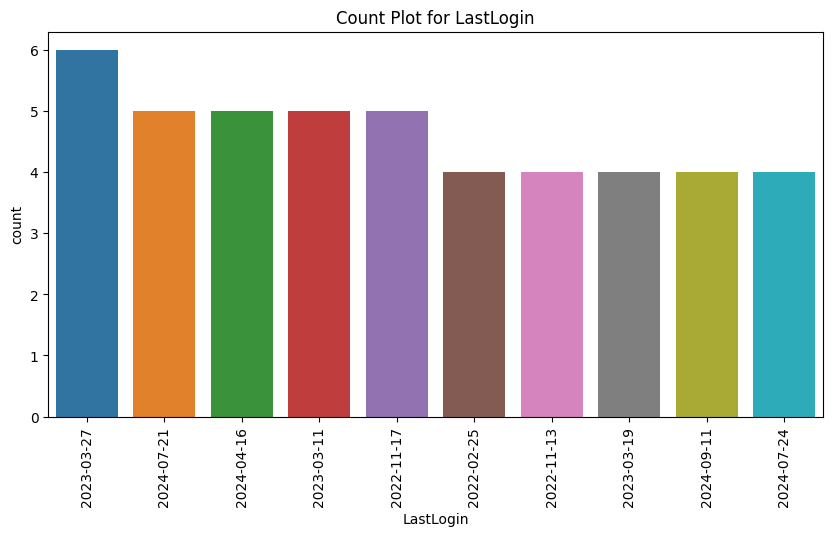

In [13]:
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column has a categorical data type
        top_10_values = data[column].value_counts().head(10)  # Get the first 10 unique values and their counts
        plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
        sns.countplot(x=column, data=data, order=top_10_values.index)
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=90)  # Rotate x-axis labels if they are long
        plt.show()


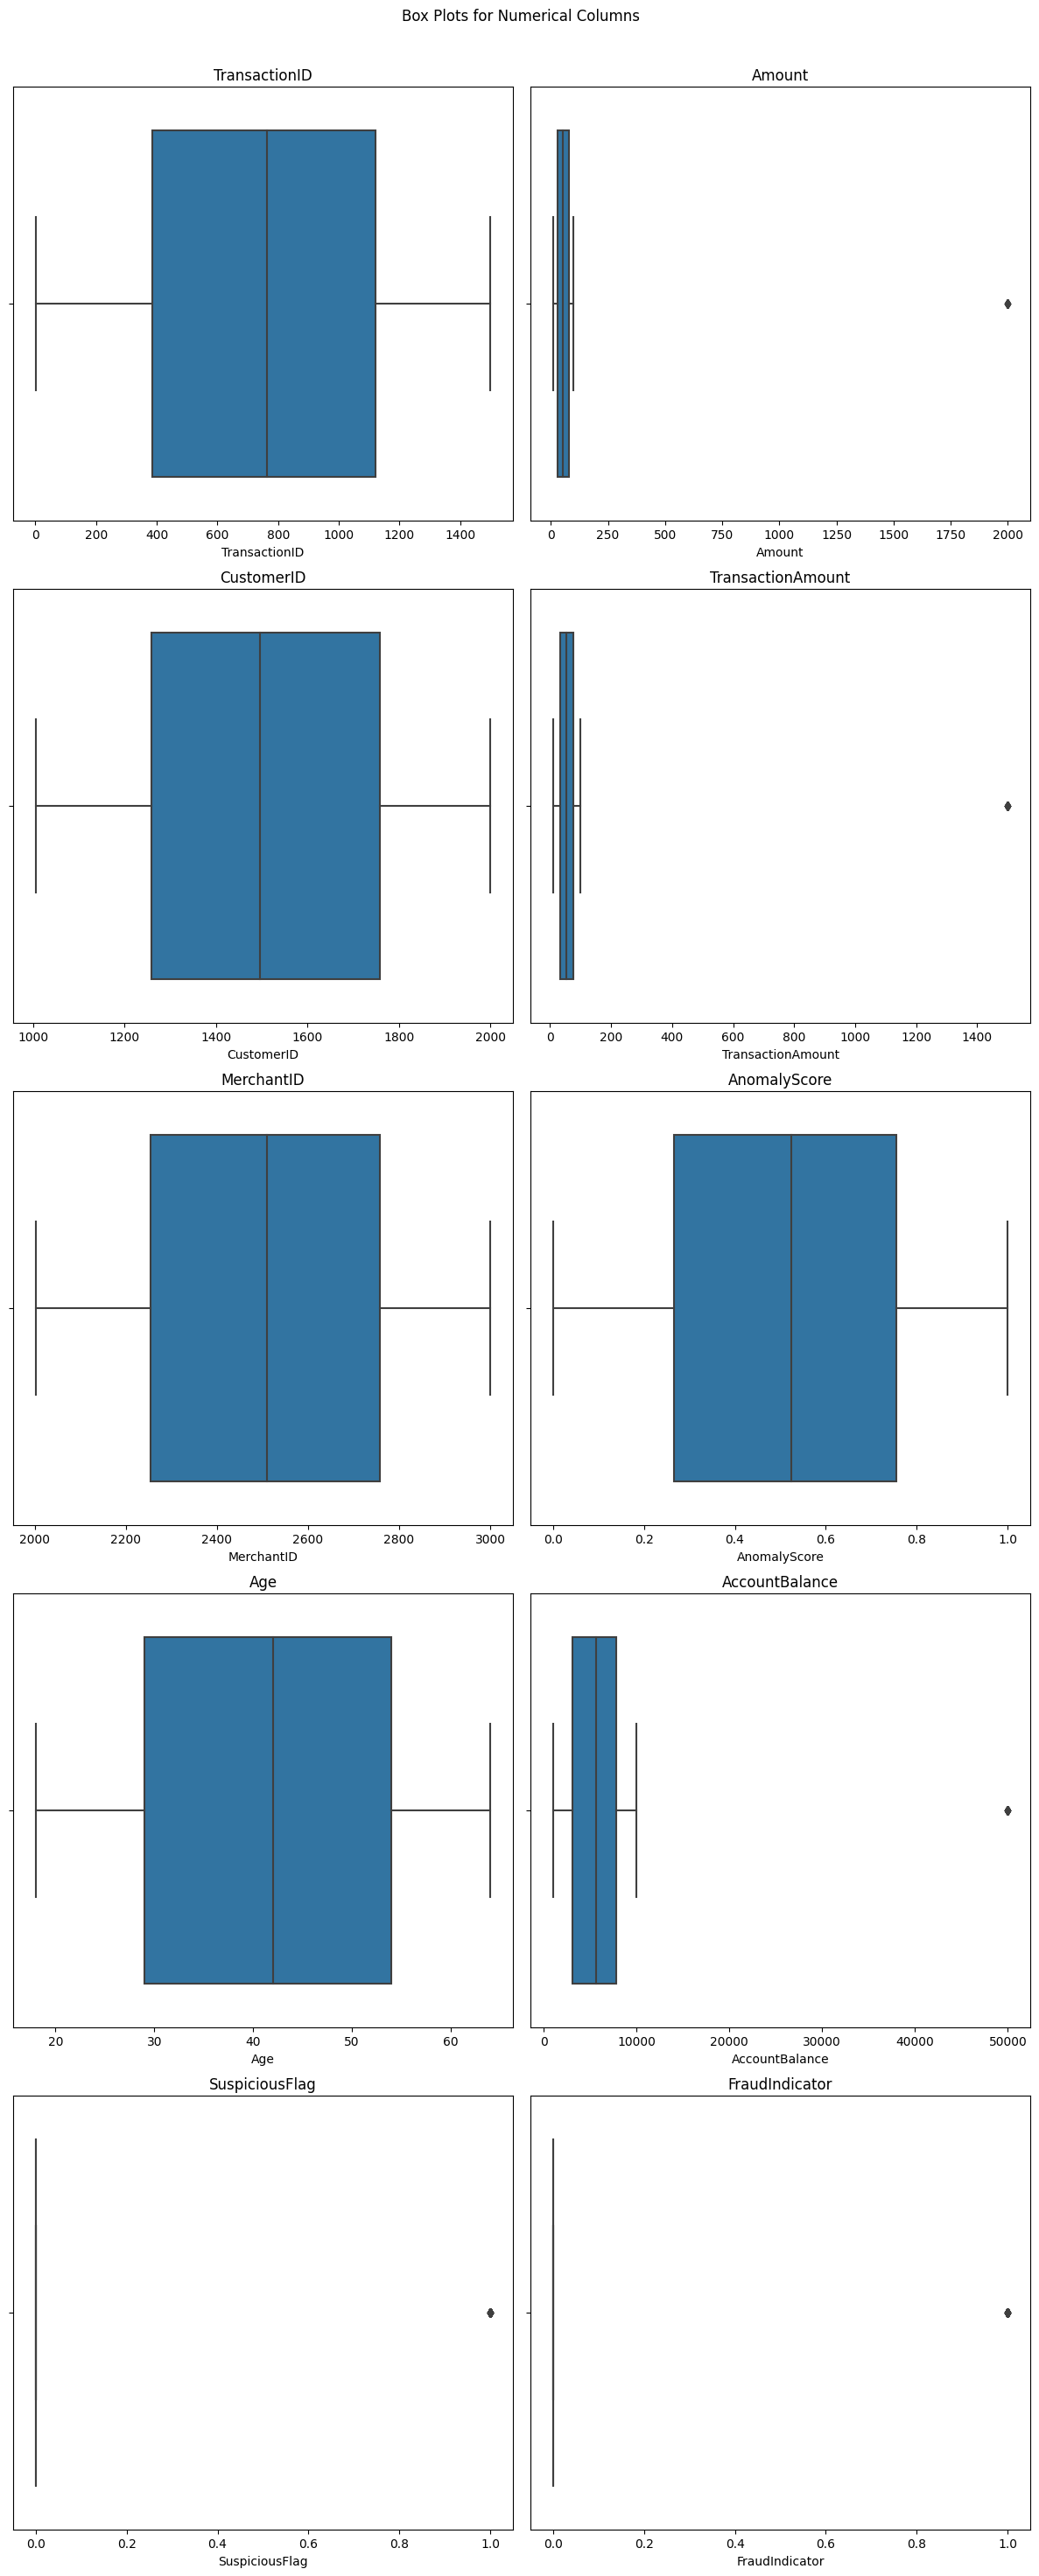

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing numerical columns

# Get the number of numerical columns
num_cols = len(data.select_dtypes(include=['number']).columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_cols // 2) + (num_cols % 2)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
fig.suptitle("Box Plots for Numerical Columns")

# Loop through the numerical columns and create box plots
for i, column in enumerate(data.select_dtypes(include=['number']).columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Remove any empty subplots
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the position of the overall title
plt.show()


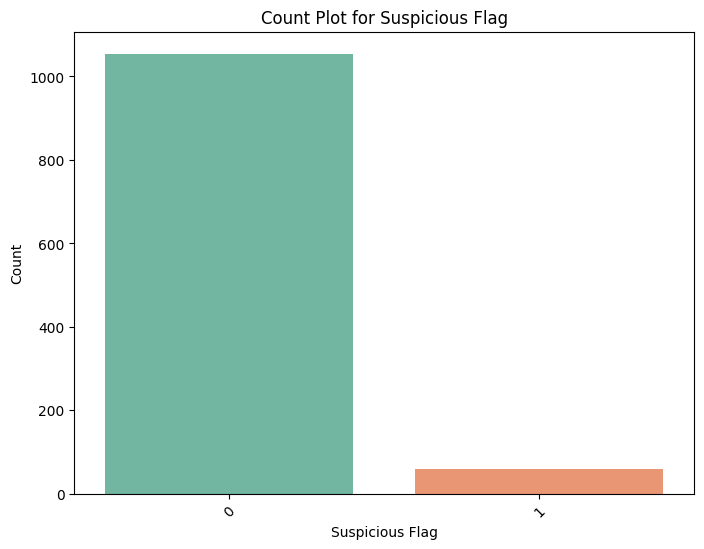

In [15]:
# We should use countplot for SuspiciousFlag feature

plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(x='SuspiciousFlag', data=data, palette='Set2')  # You can change the palette as desired
plt.title('Count Plot for Suspicious Flag')
plt.xlabel('Suspicious Flag')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long

plt.show()

### Okay we can see the dataset's target feature is heavily imbalanced sowe can use further techiniqes to equalize the feature's values 

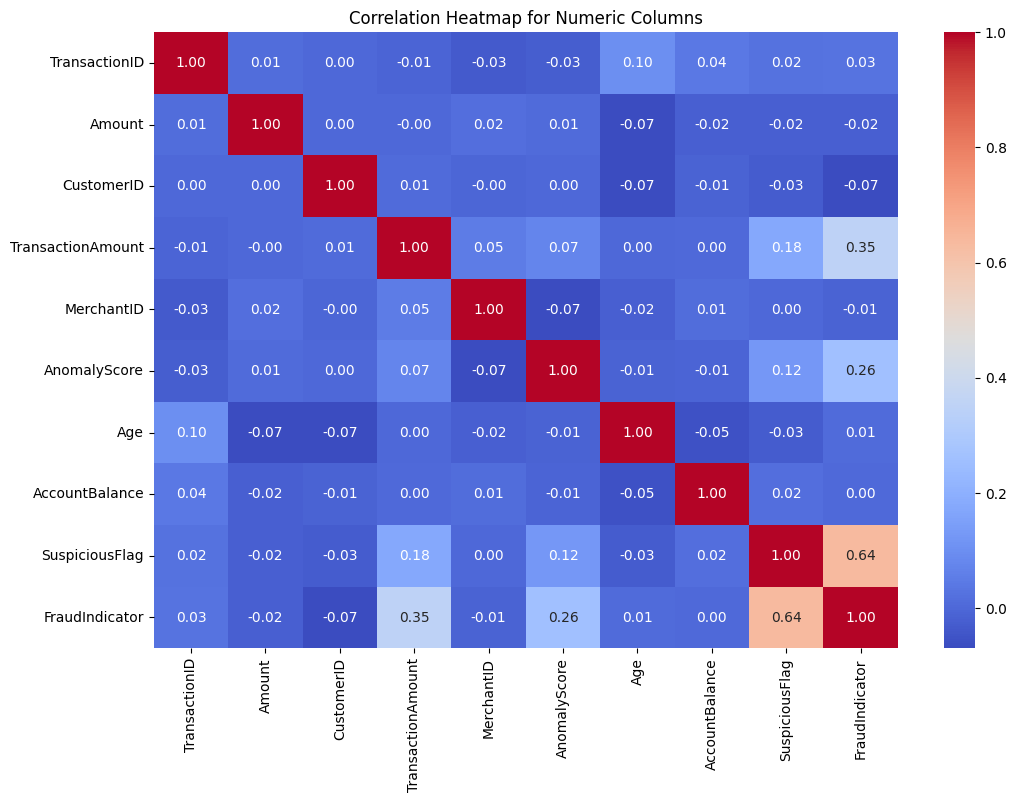

In [16]:

# Select only the numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns')

plt.show()


when you see that the variables are not correlated with each other, you can see that there is no repetition in the variables used: in the first place, there is no reason to delete columns for statistical reasons.

<div style="background-color: #ffc8dd; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">data cleaning</h1>
</div>


In [17]:
# Détecter les duplications
duplicates = data.duplicated(keep=False)  # 'keep=False' marque toutes les duplications
print("Duplications détectées:")
print(data[duplicates])

# Identifier les valeurs manquantes
missing_values = data.isnull().sum()
print("\nValeurs manquantes par colonne:")
print(missing_values)

Duplications détectées:
     TransactionID     Amount  CustomerID  TransactionAmount   
76            62.0  45.443794      1447.0          64.861871  \
77            62.0  45.443794      1447.0          64.861871   
180          135.0  47.766916      1599.0          56.989693   
181          135.0  47.766916      1599.0          56.989693   
187         1307.0  24.109392      1071.0          17.129090   
188         1307.0  24.109392      1071.0          17.129090   
238          173.0  59.319089      1118.0          67.218098   
239          173.0  59.319089      1118.0          67.218098   
257         1152.0  71.785862      1290.0                NaN   
258         1152.0  71.785862      1290.0                NaN   
552          451.0  42.973234      1476.0          19.769377   
553          451.0  42.973234      1476.0          19.769377   
563          457.0  99.132731      1356.0                NaN   
564          457.0  99.132731      1356.0                NaN   
769          750

In [18]:

# Afficher le nombre de lignes avant suppression des doublons
print("Nombre de lignes avant suppression des doublons :", data.shape[0])

# Supprimer les doublons
data = data.drop_duplicates()

# Afficher le nombre de lignes après suppression des doublons
print("Nombre de lignes après suppression des doublons :", data.shape[0])


Nombre de lignes avant suppression des doublons : 1115
Nombre de lignes après suppression des doublons : 1096


In [19]:
data.head()

,TransactionID,Amount,CustomerID,TransactionAmount,Timestamp,MerchantID,AnomalyScore,Category,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag,FraudIndicator
0,1.0,12.450998,1454.0,31.071876,NaN,2254.0,0.556580,Other,Customer 1454,53.0,Address 1454,8995.239040,2023-03-30,0,0
1,328.0,16.794415,1454.0,1499.608697,2022-01-14 15:00:00,2413.0,1.000000,Other,Customer 1454,53.0,Address 1454,8995.239040,2023-03-30,0,1
2,406.0,NaN,1454.0,32.138117,2022-01-17 21:00:00,2292.0,0.417533,Food,Customer 1454,53.0,Address 1454,8995.239040,2023-03-30,0,0
3,2.0,59.128027,1178.0,75.426673,2022-01-01 01:00:00,2295.0,0.327841,Online,Customer 1178,52.0,NaN,4015.301037,2022-06-27,0,0
4,3.0,10.443978,1484.0,26.432150,NaN,2239.0,0.773555,Travel,Customer 1484,53.0,Address 1484,7867.847795,2023-04-29,0,0


In [20]:
# Imputation pour l'âge
age_median = data['Age'].median()
data['Age'].fillna(age_median, inplace=True)

# Imputation pour l'adresse
most_common_address = data['Address'].mode()[0]
data['Address'].fillna(most_common_address, inplace=True)

In [21]:
# Afficher le nombre de lignes avant la suppression des données manquantes
print("Nombre de lignes avant la suppression des données manquantes :", data.shape[0])

# Supprimer les lignes avec des données manquantes
data_cleaned = data.dropna()

# Afficher le nombre de lignes après la suppression des données manquantes
print("Nombre de lignes après la suppression des données manquantes :", data_cleaned.shape[0])


Nombre de lignes avant la suppression des données manquantes : 1096
Nombre de lignes après la suppression des données manquantes : 795


 why we are removing the columns "TransactionID", "Name", and "Address" from the dataset:

TransactionID: This is typically a unique identifier for each transaction and does not carry predictive value for modeling purposes. Including it could add unnecessary complexity without benefiting the model's performance.

Name: Names are used to identify individuals but generally do not provide predictive value in data models, except in very specific scenarios. Names can also raise privacy concerns, especially under data protection regulations like GDPR.

Address: If the "Address" column does not contain real or useful geographic information, it may unnecessarily complicate the dataset. Removing it helps to streamline the data, especially when the addresses are not relevant to the analysis or are placeholders without substantive value.

By dropping these columns, we aim to simplify the dataset and focus on variables that contribute meaningfully to the analysis or predictive modeling, enhancing both efficiency and effectiveness.

In [22]:
# Afficher le DataFrame avant la suppression des colonnes
print("DataFrame avant la suppression des colonnes :")
print(data.head())

# Supprimer les colonnes inutiles
columns_to_drop = ['TransactionID', 'Name']
data_cleaned = data.drop(columns=columns_to_drop)

# Afficher le DataFrame après la suppression des colonnes
print("\nDataFrame après la suppression des colonnes :")
print(data_cleaned.head())

DataFrame avant la suppression des colonnes :
   TransactionID     Amount  CustomerID  TransactionAmount   
0            1.0  12.450998      1454.0          31.071876  \
1          328.0  16.794415      1454.0        1499.608697   
2          406.0        NaN      1454.0          32.138117   
3            2.0  59.128027      1178.0          75.426673   
4            3.0  10.443978      1484.0          26.432150   

             Timestamp  MerchantID  AnomalyScore Category           Name   
0                  NaN      2254.0      0.556580    Other  Customer 1454  \
1  2022-01-14 15:00:00      2413.0      1.000000    Other  Customer 1454   
2  2022-01-17 21:00:00      2292.0      0.417533     Food  Customer 1454   
3  2022-01-01 01:00:00      2295.0      0.327841   Online  Customer 1178   
4                  NaN      2239.0      0.773555   Travel  Customer 1484   

    Age       Address  AccountBalance   LastLogin  SuspiciousFlag   
0  53.0  Address 1454     8995.239040  2023-03-30      

In [23]:
print(data_cleaned.columns)
print('--------------------------------------------')
print(data_cleaned['FraudIndicator'].value_counts(), data_cleaned['SuspiciousFlag'].value_counts(), data_cleaned['Category'].value_counts())

Index(['Amount', 'CustomerID', 'TransactionAmount', 'Timestamp', 'MerchantID',
       'AnomalyScore', 'Category', 'Age', 'Address', 'AccountBalance',
       'LastLogin', 'SuspiciousFlag', 'FraudIndicator'],
      dtype='object')
--------------------------------------------
FraudIndicator
0    1032
1      64
Name: count, dtype: int64 SuspiciousFlag
0    1037
1      59
Name: count, dtype: int64 Category
Food      236
Other     221
Retail    221
Travel    219
Online    199
Name: count, dtype: int64


<div style="background-color: #ffc8dd; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">Feature Engineering</h1>
</div>


time fetures:

In [24]:
#Converting TimeStamp to datetime format

data_cleaned['Timestamp1'] = pd.to_datetime(data_cleaned['Timestamp'])

print(data_cleaned.dtypes)

data_cleaned['Hour'] = data_cleaned['Timestamp1'].dt.hour
data_cleaned['LastLogin'] = pd.to_datetime(data_cleaned['LastLogin'])
data_cleaned['gap'] = (data_cleaned['Timestamp1'] - data_cleaned['LastLogin']).dt.days.abs()

# Supprimer les lignes avec des données manquantes
data_cleaned = data_cleaned.dropna()



Amount                      float64
CustomerID                  float64
TransactionAmount           float64
Timestamp                    object
MerchantID                  float64
AnomalyScore                float64
Category                     object
Age                         float64
Address                      object
AccountBalance              float64
LastLogin                    object
SuspiciousFlag                int64
FraudIndicator                int64
Timestamp1           datetime64[ns]
dtype: object


In [25]:
data_cleaned.head()

,Amount,CustomerID,TransactionAmount,Timestamp,MerchantID,AnomalyScore,Category,Age,Address,AccountBalance,LastLogin,SuspiciousFlag,FraudIndicator,Timestamp1,Hour,gap
1,16.794415,1454.0,1499.608697,2022-01-14 15:00:00,2413.0,1.000000,Other,53.0,Address 1454,8995.239040,2023-03-30,0,1,2022-01-14 15:00:00,15.0,440.0
3,59.128027,1178.0,75.426673,2022-01-01 01:00:00,2295.0,0.327841,Online,52.0,Address 1451,4015.301037,2022-06-27,0,0,2022-01-01 01:00:00,1.0,177.0
6,39.421277,1380.0,66.349710,2022-01-01 03:00:00,2261.0,0.559289,Online,54.0,Address 1380,4185.451309,2023-01-15,0,0,2022-01-01 03:00:00,3.0,379.0
7,27.516275,1380.0,12.644558,2022-01-04 07:00:00,2568.0,0.525319,Other,54.0,Address 1380,4185.451309,2023-01-15,0,0,2022-01-04 07:00:00,7.0,376.0
8,81.690454,1380.0,12.508696,2022-02-08 01:00:00,2103.0,0.451963,Retail,54.0,Address 1380,4185.451309,2023-01-15,0,0,2022-02-08 01:00:00,1.0,341.0


ID features:

In [26]:
# lets divide the data into two parts: one for training and the other for testing

from sklearn.model_selection import train_test_split

# Sélectionner les colonnes pour la modélisation, en ignorant les colonnes temporelles initiales
features = data_cleaned.drop(['Timestamp', 'Timestamp1', 'LastLogin', 'Address'], axis=1)
target = data_cleaned['FraudIndicator']

# Diviser les données en 70% pour l'entraînement et 30% pour le test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [27]:
# Calcul des moyennes pour le mean encoding
merchant_means = X_train.groupby('MerchantID')['FraudIndicator'].mean()
category_means = X_train.groupby('Category')['FraudIndicator'].mean()
customer_means = X_train.groupby('CustomerID')['FraudIndicator'].mean()

# Application des moyennes à l'ensemble d'entraînement
X_train['MerchantID'] = X_train['MerchantID'].map(merchant_means)
X_train['Category'] = X_train['Category'].map(category_means)
X_train['CustomerID'] = X_train['CustomerID'].map(customer_means)

X_test['MerchantID'] = X_test['MerchantID'].map(merchant_means)
X_test['Category'] = X_test['Category'].map(category_means)
X_test['CustomerID'] = X_test['CustomerID'].map(customer_means)

# Assurez-vous de remplir les valeurs manquantes après le mapping
X_train['MerchantID'].fillna(0, inplace=True)
X_train['Category'].fillna(0, inplace=True)
X_train['CustomerID'].fillna(0, inplace=True)

X_test['MerchantID'].fillna(0, inplace=True)
X_test['Category'].fillna(0, inplace=True)
X_test['CustomerID'].fillna(0, inplace=True)

X_train = X_train.drop(['FraudIndicator'], axis=1)
X_test = X_test.drop(['FraudIndicator'], axis=1)


In [28]:
X_train.head(), X_test.head(), y_train.head(), y_test.head()

(        Amount  CustomerID  TransactionAmount  MerchantID  AnomalyScore   
 820  44.638208         1.0          51.360595         1.0      0.863773  \
 226  42.963751         0.0          75.283347         0.0      0.237883   
 561  98.654118         0.0          26.037819         0.0      0.987310   
 399  37.510905         0.0          19.051881         0.0      0.049216   
 424  47.000035         0.0          38.739390         0.0      0.584732   
 
      Category   Age  AccountBalance  SuspiciousFlag  Hour    gap  
 820  0.023622  42.0     8267.385928               0  17.0   50.0  
 226  0.096296  60.0     8774.919196               0  16.0  387.0  
 561  0.023622  60.0     8184.705591               0  15.0  368.0  
 399  0.067227  29.0     1515.144691               0   4.0  819.0  
 424  0.076336  28.0     6953.201068               0   3.0  716.0  ,
         Amount  CustomerID  TransactionAmount  MerchantID  AnomalyScore   
 892  30.406902         0.0          79.189677         0.

<div style="background-color: #ccd5ae; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">Data Modelling</h1>
</div>


In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((626, 11), (269, 11), (626,), (269,))

Meilleur hyperparamètre C trouvé: 1.8873918221350996
Performance sur l'ensemble d'entraînement:
  Précision: 0.9474
  Rappel: 1.0000
  F1 Score: 0.9730
  Exactitude: 0.9968

Performance sur l'ensemble de test:
  Précision: 0.0714
  Rappel: 0.0769
  F1 Score: 0.0741
  Exactitude: 0.9071



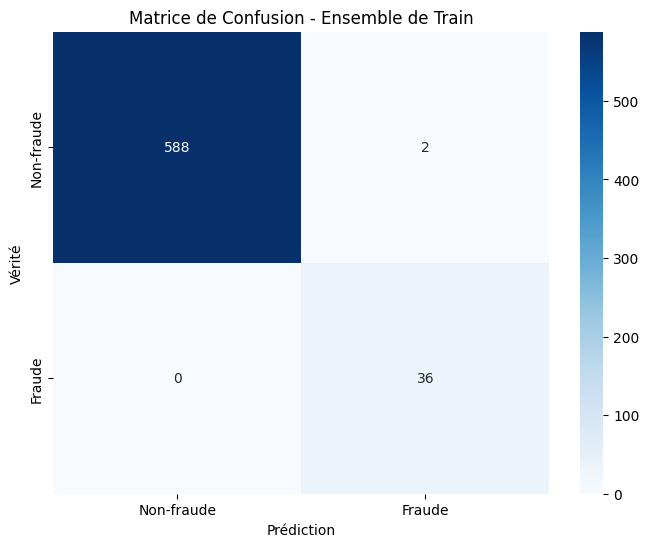

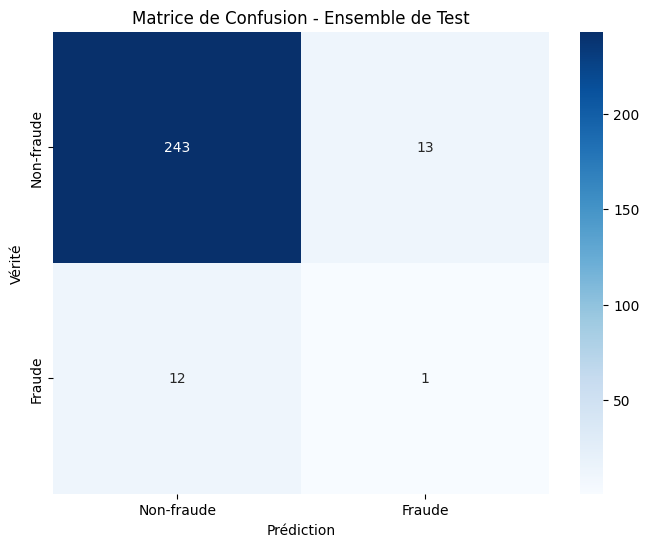

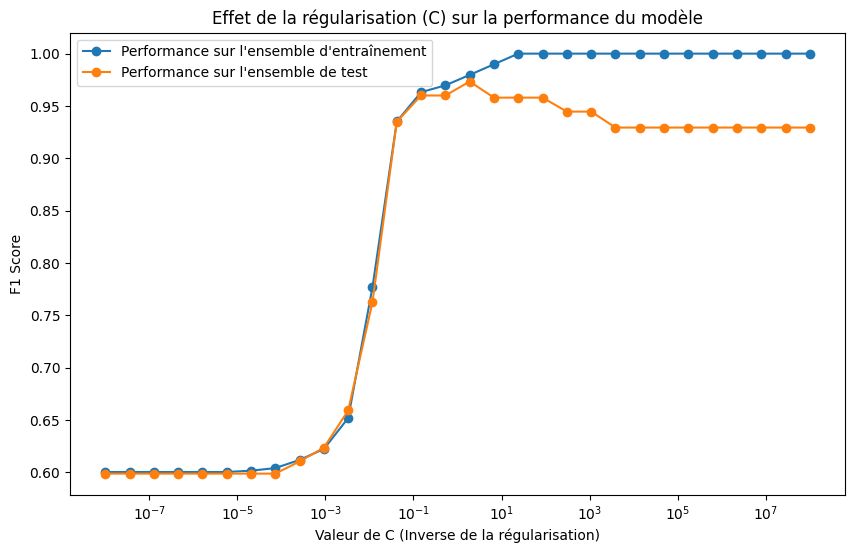

In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Standardiser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir la régression logistique avec pondération des classes
log_reg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, class_weight='balanced')

# Hyperparamètre 'C' à optimiser (inverse de la force de régularisation)
param_grid = {'C': np.logspace(-8, 8, 30)}  # explore différentes valeurs de C

# Utiliser GridSearchCV pour trouver le meilleur hyperparamètre C
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

# Meilleur modèle après optimisation
best_log_reg = grid_search.best_estimator_

# Afficher le meilleur hyperparamètre C
print(f"Meilleur hyperparamètre C trouvé: {grid_search.best_params_['C']}")

# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = best_log_reg.predict(X_train_scaled)
y_test_pred = best_log_reg.predict(X_test_scaled)

# Calculer les métriques de performance
def print_metrics(y_true, y_pred, dataset_type):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Performance sur {dataset_type}:")
    print(f"  Précision: {precision:.4f}")
    print(f"  Rappel: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Exactitude: {accuracy:.4f}\n")

print_metrics(y_train, y_train_pred, "l'ensemble d'entraînement")
print_metrics(y_test, y_test_pred, "l'ensemble de test")
# Afficher la matrice de confusion pour l'ensemble de test


conf_matrix = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-fraude', 'Fraude'], yticklabels=['Non-fraude', 'Fraude'])
plt.title('Matrice de Confusion - Ensemble de Train')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.show()

# Afficher la matrice de confusion pour l'ensemble de test
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-fraude', 'Fraude'], yticklabels=['Non-fraude', 'Fraude'])
plt.title('Matrice de Confusion - Ensemble de Test')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.show()

# Visualiser l'effet de l'hyperparamètre C sur l'overfitting
train_scores = grid_search.cv_results_['mean_train_score']
test_scores = grid_search.cv_results_['mean_test_score']
param_values = grid_search.cv_results_['param_C']

plt.figure(figsize=(10, 6))
plt.plot(param_values, train_scores, label='Performance sur l\'ensemble d\'entraînement', marker='o')
plt.plot(param_values, test_scores, label='Performance sur l\'ensemble de test', marker='o')
plt.xscale('log')
plt.xlabel('Valeur de C (Inverse de la régularisation)')
plt.ylabel('F1 Score')
plt.title('Effet de la régularisation (C) sur la performance du modèle')
plt.legend()
plt.show()




Meilleur hyperparamètre max_depth trouvé: 1
Performance sur l'ensemble d'entraînement:
  Précision: 0.7059
  Rappel: 1.0000
  F1 Score: 0.8276
  Exactitude: 0.9760

Performance sur l'ensemble de test:
  Précision: 0.1429
  Rappel: 0.0769
  F1 Score: 0.1000
  Exactitude: 0.9331



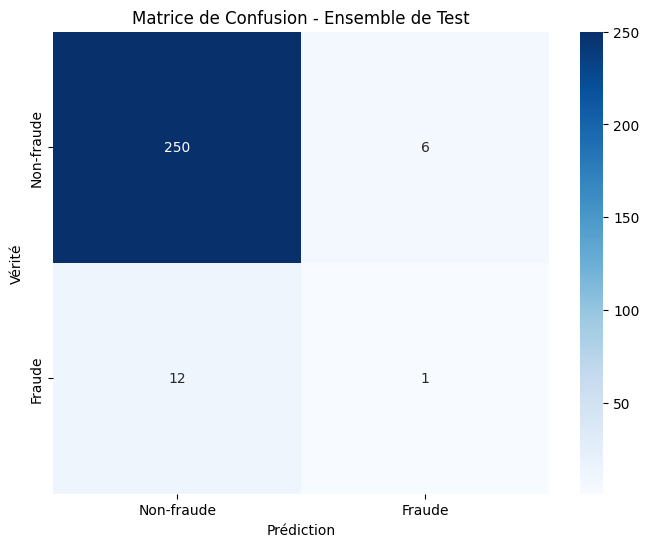

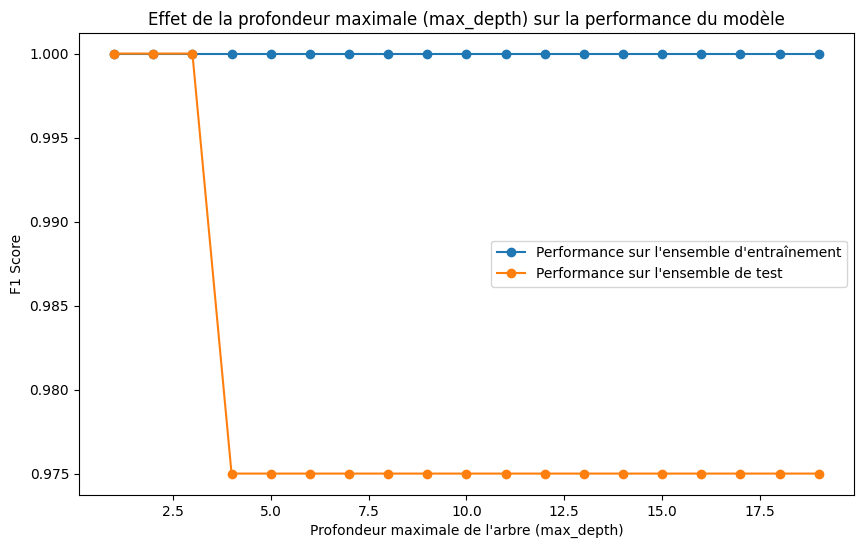

In [31]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Charger vos données (remplacez par vos propres données si nécessaire)
# Assurez-vous que X_train, X_test, y_train, y_test ont déjà été définis et prétraités comme décrit précédemment

# Définir l'arbre de décision avec gestion des classes déséquilibrées
tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Hyperparamètres à optimiser (profondeur maximale de l'arbre)
param_grid = {'max_depth': range(1, 20)}  # Explorer les profondeurs de 1 à 20

# Utiliser GridSearchCV pour trouver le meilleur hyperparamètre max_depth
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='recall', return_train_score=True)
grid_search.fit(X_train, y_train)

# Meilleur modèle après optimisation
best_tree = grid_search.best_estimator_

# Afficher le meilleur hyperparamètre max_depth
print(f"Meilleur hyperparamètre max_depth trouvé: {grid_search.best_params_['max_depth']}")

# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = best_tree.predict(X_train)
y_test_pred = best_tree.predict(X_test)

# Calculer les métriques de performance
def print_metrics(y_true, y_pred, dataset_type):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Performance sur {dataset_type}:")
    print(f"  Précision: {precision:.4f}")
    print(f"  Rappel: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Exactitude: {accuracy:.4f}\n")

print_metrics(y_train, y_train_pred, "l'ensemble d'entraînement")
print_metrics(y_test, y_test_pred, "l'ensemble de test")

# Afficher la matrice de confusion pour l'ensemble de test
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-fraude', 'Fraude'], yticklabels=['Non-fraude', 'Fraude'])
plt.title('Matrice de Confusion - Ensemble de Test')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.show()

# Visualiser l'effet du hyperparamètre max_depth sur la performance
train_scores = grid_search.cv_results_['mean_train_score']
test_scores = grid_search.cv_results_['mean_test_score']
param_values = list(param_grid['max_depth'])

plt.figure(figsize=(10, 6))
plt.plot(param_values, train_scores, label='Performance sur l\'ensemble d\'entraînement', marker='o')
plt.plot(param_values, test_scores, label='Performance sur l\'ensemble de test', marker='o')
plt.xlabel('Profondeur maximale de l\'arbre (max_depth)')
plt.ylabel('F1 Score')
plt.title('Effet de la profondeur maximale (max_depth) sur la performance du modèle')
plt.legend()
plt.show()


Meilleurs hyperparamètres: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Performance sur l'ensemble d'entraînement (Random Forest):
  Précision: 0.9730
  Rappel: 1.0000
  F1 Score: 0.9863
  Exactitude: 0.9984

Performance sur l'ensemble de test (Random Forest):
  Précision: 0.0000
  Rappel: 0.0000
  F1 Score: 0.0000
  Exactitude: 0.9517



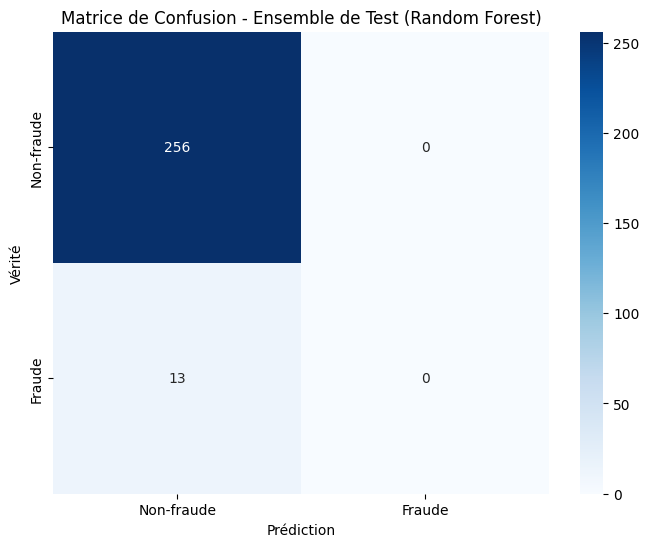

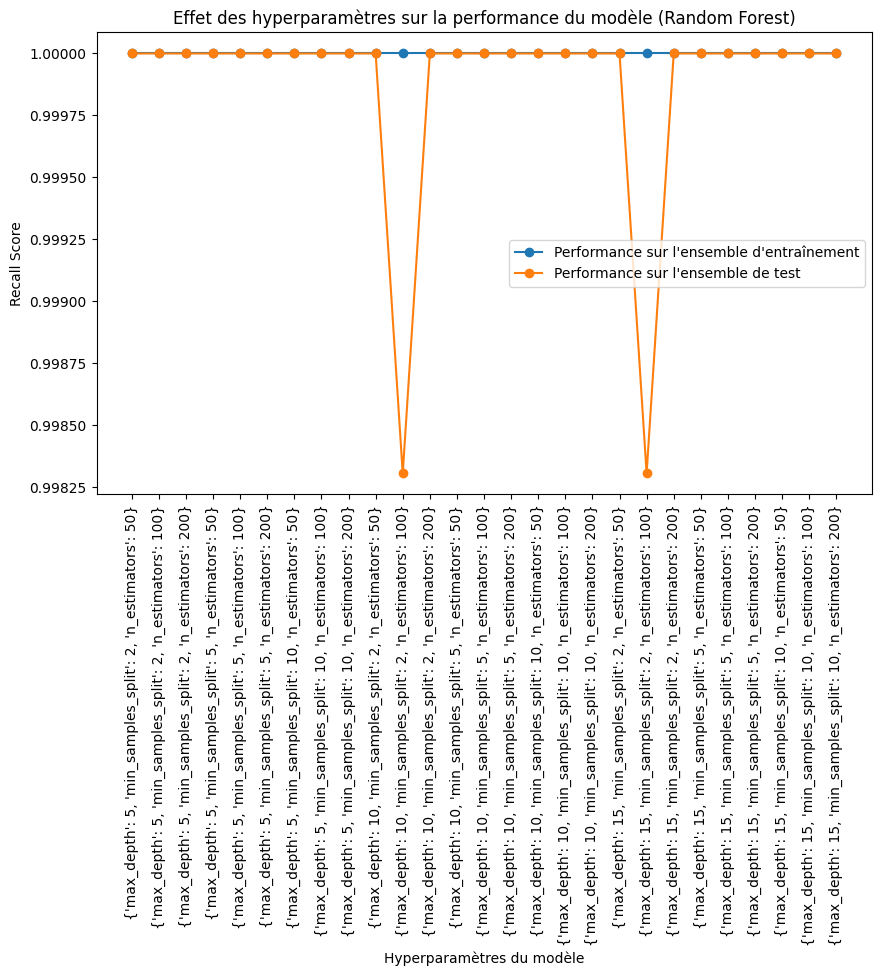

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Option 1: Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Option 2: Try Random Forest instead of a single Decision Tree
forest = RandomForestClassifier(random_state=42, class_weight='balanced')
param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search_forest = GridSearchCV(forest, param_grid_forest, cv=2, scoring='recall', return_train_score=True)
grid_search_forest.fit(X_train_resampled, y_train_resampled)

# Best model
best_forest = grid_search_forest.best_estimator_
print(f"Meilleurs hyperparamètres: {grid_search_forest.best_params_}")

# Predictions
y_train_pred_forest = best_forest.predict(X_train)
y_test_pred_forest = best_forest.predict(X_test)

# Evaluate
print_metrics(y_train, y_train_pred_forest, "l'ensemble d'entraînement (Random Forest)")
print_metrics(y_test, y_test_pred_forest, "l'ensemble de test (Random Forest)")

# Confusion matrix
conf_matrix_forest = confusion_matrix(y_test, y_test_pred_forest)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_forest, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-fraude', 'Fraude'], yticklabels=['Non-fraude', 'Fraude'])
plt.title('Matrice de Confusion - Ensemble de Test (Random Forest)')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.show()

# Visualize the effect of hyperparameters (Random Forest)
train_scores_forest = grid_search_forest.cv_results_['mean_train_score']
test_scores_forest = grid_search_forest.cv_results_['mean_test_score']
param_values_forest = [str(x) for x in grid_search_forest.cv_results_['params']]

plt.figure(figsize=(10, 6))
plt.plot(param_values_forest, train_scores_forest, label='Performance sur l\'ensemble d\'entraînement', marker='o')
plt.plot(param_values_forest, test_scores_forest, label='Performance sur l\'ensemble de test', marker='o')
plt.xlabel('Hyperparamètres du modèle')
plt.ylabel('Recall Score')
plt.title('Effet des hyperparamètres sur la performance du modèle (Random Forest)')
plt.xticks(rotation=90)
plt.legend()
plt.show()
